In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
import pandas as pd
import numpy as np
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
from matplotlib import colors

In [4]:
x, y = make_blobs(n_samples=100, n_features=2, centers=3, cluster_std=[0.75,0.5, 1], random_state=42)

In [5]:
def plot_blobs(x, y, ax, cmap='viridis'):
    labels = np.unique(y)
    cmap_ = plt.get_cmap(cmap, lut=len(labels))
    ar = []
    for label in labels:
        sub_idx = np.argwhere(y == label).ravel()
        sub_x = x[sub_idx]
        sub_y = y[sub_idx]
        ar.append(ax.scatter(sub_x[:,0], sub_x[:,1], color=cmap_(label), label=label))
    return ar

In [6]:
from kmeans import KMeans

In [7]:
model = KMeans(n_clusters=3)

In [8]:
model.train_data = x

In [9]:
centers = model.initialize_centers()

In [10]:
_ = model.optimize(n_iterations=10000, lr=0.01)

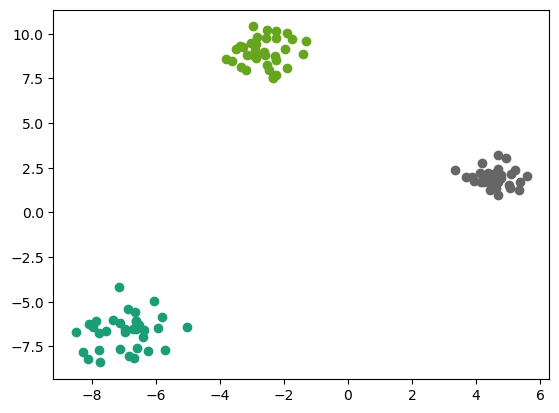

In [11]:
pred = model.get_labels()
plot_blobs(x, pred, ax=plt.gca(), cmap='Dark2')
plot_blobs(model.centers, np.arange(0,len(model.centers)), ax=plt.gca(), cmap='Dark2')

In [12]:
np.append([[1,2]], [[3,4]], axis=0)

array([[1, 2],
       [3, 4]])

In [13]:
from matplotlib.animation import FuncAnimation

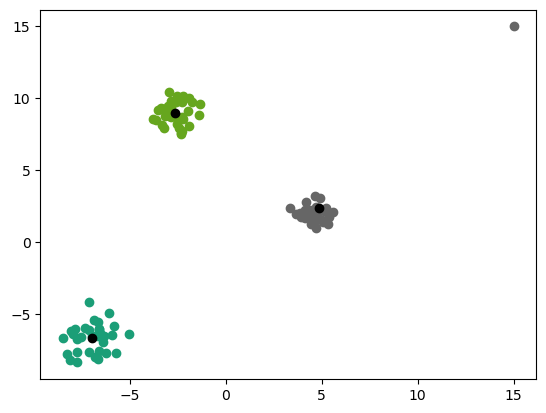

In [14]:
fig = plt.gcf()
ax = plt.gca()

def update(new_value: float):
    ax.cla()
    new_x = np.append(x, [[new_value, new_value]], axis=0)
    model.train_data = new_x
    model.optimize(1000)
    pred_new = model.get_labels()
    new_cm = colors.ListedColormap(colors=['black', 'black', 'black'])
    ar1 = plot_blobs(new_x, pred_new, ax=ax, cmap='Dark2')
    ar2 = plot_blobs(model.centers, np.arange(0,len(model.centers)), ax=ax, cmap=new_cm)
    return ar1 + ar2
ani = FuncAnimation(fig, func=update, frames=np.arange(15,100,1), blit=True)
plt.show()

In [15]:
from matplotlib.animation import ImageMagickFileWriter, FFMpegBase

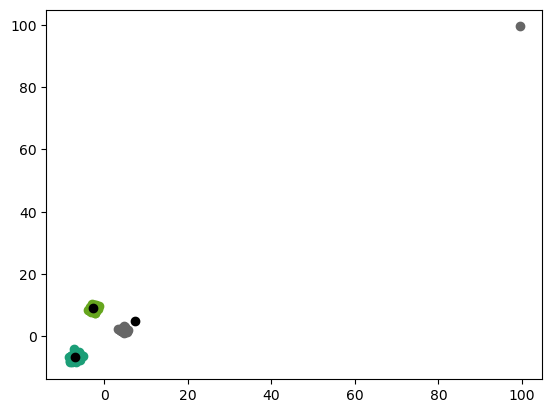

In [17]:
fig = plt.gcf()
ax = plt.gca()
moviewriter = ImageMagickFileWriter(fps=30)
moviewriter.setup(fig, 'my_movie.gif', dpi=100)
for j in np.arange(15,100, 0.5):
    update(j)
    moviewriter.grab_frame()
moviewriter.finish()